# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

We aim to develop a supervised regression model to predict used car prices based on historical sales data. This involves identifying and quantifying the impact of key features—such as vehicle age, mileage, brand, and geographic location—on the target variable, price. The goal is to uncover statistically significant predictors and build a model that generalizes well to unseen data, enabling data-driven pricing and inventory decisions

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the dataset
df = pd.read_csv('data/vehicles.csv')

In [150]:
len(df.manufacturer.value_counts())

42

In [ ]:
# Already can see tons of missing values
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [152]:
len(df)

426880

<Axes: >

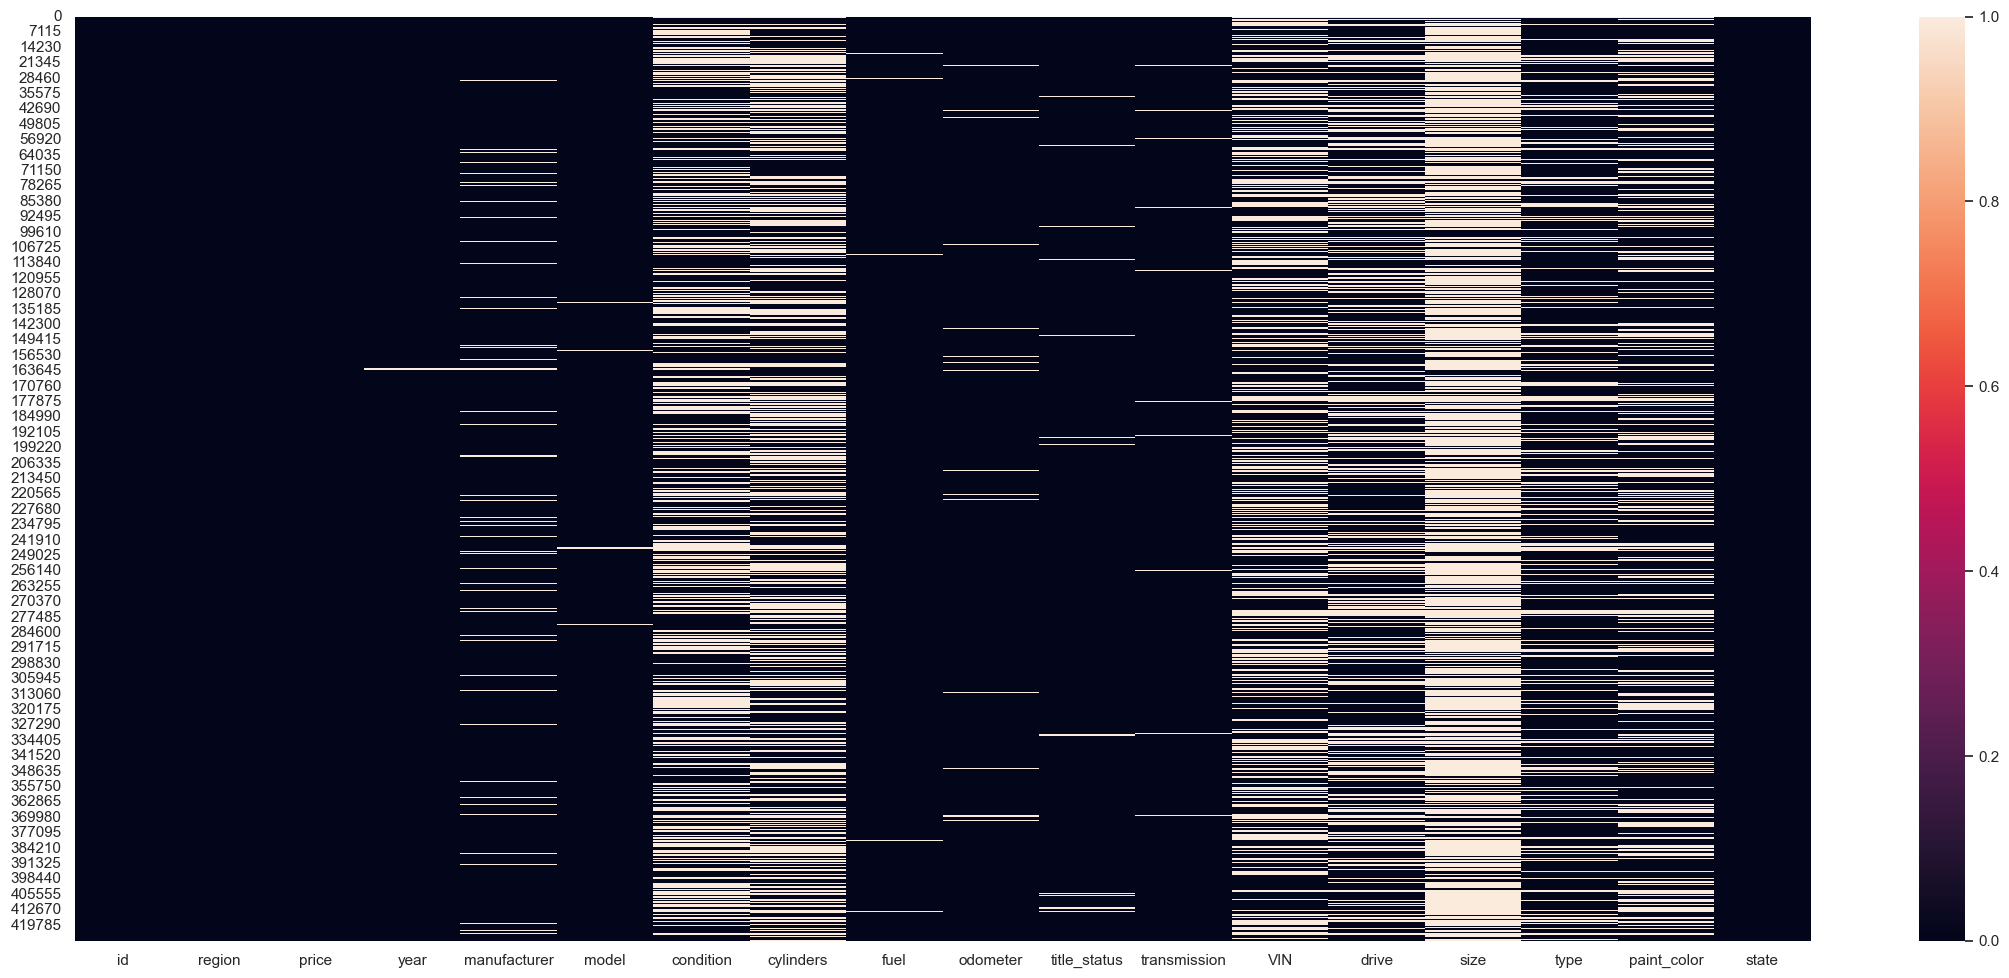

In [ ]:
# Visualize missing values to see where we need to clean up
sns.set(rc={'figure.figsize':(28,12)})
sns.heatmap(df.isna())

In [154]:
pd.isna(df).sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [ ]:
# Drop columns I don't think will be very useful for analysis or that have too many missing values to be useful
df = df.drop(columns=['id', 'condition', 'cylinders', 'VIN', 'size', 'type', 'paint_color', 'drive', 'model', 'region'])

<Axes: >

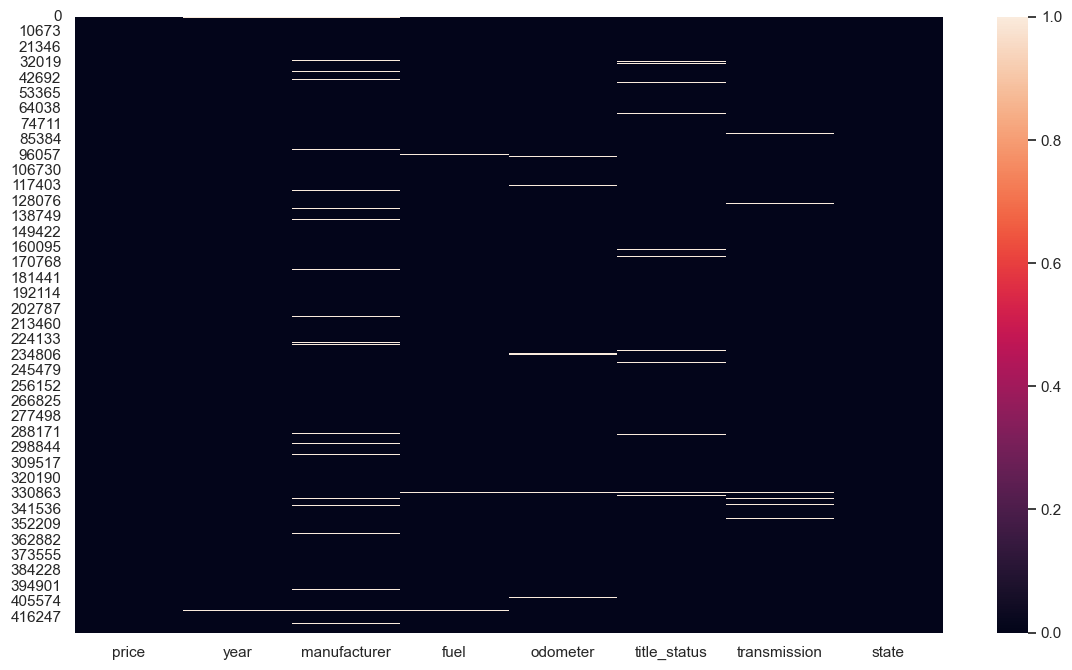

In [156]:
# Check for null values again
sns.set(rc={'figure.figsize':(14,8)})
sns.heatmap(df.isna())

In [157]:
# Not that many null values left, drop them from data 
df = df.dropna()
df_no_nulls = df.copy()

In [158]:
df.isna().sum()

price           0
year            0
manufacturer    0
fuel            0
odometer        0
title_status    0
transmission    0
state           0
dtype: int64

In [159]:
# Discover category values and counts to consider how we will encode them
# Few enough categories in each feature to use one-hot encoding
print(df.fuel.value_counts())
print()
print(df.transmission.value_counts())
print()
print(df.title_status.value_counts())

fuel
gas         333378
other        29136
diesel       25687
hybrid        4984
electric      1566
Name: count, dtype: int64

transmission
automatic    313337
other         59601
manual        21813
Name: count, dtype: int64

title_status
clean         381984
rebuilt         6925
salvage         3700
lien            1345
missing          647
parts only       150
Name: count, dtype: int64


In [160]:
# State column has many too many categories for OHE but may be influenctial for pricing so will create new column that has average car price per state and use that as a feature
df.groupby('state')['price'].mean()


state
ak    2.377452e+04
al    2.626224e+05
ar    1.819730e+04
az    1.938772e+04
ca    1.310272e+05
co    1.800083e+04
ct    1.461618e+04
dc    1.451665e+04
de    3.387404e+06
fl    1.769755e+04
ga    1.703682e+05
hi    1.878073e+04
ia    1.599178e+04
id    3.659968e+04
il    1.656638e+04
in    2.465730e+05
ks    1.913563e+04
ky    1.918695e+04
la    1.763804e+04
ma    1.557344e+04
md    3.288155e+05
me    1.339173e+04
mi    2.380490e+04
mn    1.610289e+04
mo    2.099426e+04
ms    1.718465e+04
mt    2.349904e+04
nc    3.490597e+04
nd    1.658834e+04
ne    1.765861e+04
nh    1.595160e+04
nj    3.524914e+05
nm    1.887866e+04
nv    1.959341e+04
ny    1.686967e+04
oh    2.771999e+04
ok    3.778456e+04
or    2.486269e+05
pa    1.545919e+04
ri    1.501643e+04
sc    1.892669e+04
sd    1.793199e+04
tn    3.816553e+05
tx    2.166647e+04
ut    2.399118e+04
va    1.416492e+04
vt    1.644383e+04
wa    2.347217e+04
wi    1.693960e+04
wv    2.448050e+04
wy    2.094392e+04
Name: price, dtype: float

In [161]:
df['price'].sort_values(ascending=False).head(50)

318592    3736928711
356716    3736928711
257840    3024942282
91576     3024942282
37410     3009548743
184704    1410065407
153082    1234567890
37409     1111111111
29386     1111111111
280        987654321
122470     987654321
230753     135008900
137807     123456789
288356     123456789
193736     123456789
307488     123456789
241404     113456789
1838        99999999
379133      25003000
136516      17000000
288400      12345678
303014      12345678
286324      12345678
286323      12345678
303644      12345678
288401      12345678
353641      11111111
300308      10004000
105843       6995495
68935        2000000
362837       1234567
367357       1234567
384898       1234567
377515       1234567
367296       1234567
155421       1234567
194292       1234567
377396       1234567
362867       1234567
384872       1234567
362822       1234567
367308       1234567
377425       1234567
283429       1111111
213918       1111111
26075        1111111
219241       1111111
356959       

In [162]:
# After looking through means its very clear that some of the inputed data is wrong. For example theres no way that the average price in CA is $126,653. Found a sale of a Ford f350 for over $1 billion dollars in the data. Will have to remove extreme outliers
upper_bound = 500000
lower_bound = 500
df = df[(df['price'] < upper_bound) & (df['price'] > lower_bound)]

In [163]:
df.groupby('state')['price'].mean().sort_values(ascending=False).head(50)
# These look much more reasonable

# Also gives us insight into which states have highest average car prices

state
wa    26764.474597
wv    25780.771520
mt    24651.727436
ut    24456.055340
ak    24156.220401
mo    23248.286784
id    22823.305317
ar    22652.048718
wy    22396.876173
nm    22323.535643
hi    22152.607472
ok    21577.103513
tx    21487.354080
al    21484.699410
sc    21167.510988
or    20871.702063
az    20812.972426
la    20653.299804
tn    20640.766742
nv    20607.222302
ga    20483.147937
nc    20146.058122
ks    20042.320856
in    19937.549847
ky    19632.041344
co    19155.690737
ca    19027.018727
md    18996.034812
fl    18856.924117
sd    18802.512361
ny    18569.164115
il    18132.342299
ne    18009.382320
vt    17676.812329
nd    17439.025641
va    17318.397959
wi    17239.478599
nh    17099.252238
mn    16938.694420
ia    16900.953994
ms    16668.148148
pa    16631.793130
mi    16461.508246
ma    16385.835406
oh    16336.861585
me    16311.557413
de    16276.617047
dc    16270.149151
nj    15512.681759
ri    15458.108696
Name: price, dtype: float64

In [164]:
# Create an average price per state column to use as a feature instead of the state column
avg_price_per_state = df.groupby('state')['price'].mean()
df['state_avg_price'] = df['state'].map(avg_price_per_state)
df.head()


,price,year,manufacturer,fuel,odometer,title_status,transmission,state,state_avg_price
27,33590,2014.0,gmc,gas,57923.0,clean,other,al,21484.69941
28,22590,2010.0,chevrolet,gas,71229.0,clean,other,al,21484.69941
29,39590,2020.0,chevrolet,gas,19160.0,clean,other,al,21484.69941
30,30990,2017.0,toyota,gas,41124.0,clean,other,al,21484.69941
31,15000,2013.0,ford,gas,128000.0,clean,automatic,al,21484.69941


In [165]:
# Remove rows probable with data entry errors in the odometer column
df = df.query('odometer != 0 and odometer < 500000')
df.head()

,price,year,manufacturer,fuel,odometer,title_status,transmission,state,state_avg_price
27,33590,2014.0,gmc,gas,57923.0,clean,other,al,21484.69941
28,22590,2010.0,chevrolet,gas,71229.0,clean,other,al,21484.69941
29,39590,2020.0,chevrolet,gas,19160.0,clean,other,al,21484.69941
30,30990,2017.0,toyota,gas,41124.0,clean,other,al,21484.69941
31,15000,2013.0,ford,gas,128000.0,clean,automatic,al,21484.69941


In [ ]:
# One hot encode the categorical variables
# Manufacturer has many categories to encode but is important for analysis so will use OHE on it as well
df_cleaned = pd.get_dummies(df[['fuel', 'transmission', 'title_status', 'manufacturer']], dtype=int,  drop_first=True)
df_cleaned[['price', 'year', 'odometer', 'state_avg_price']] = df[['price', 'year', 'odometer', 'state_avg_price']]

In [167]:
# Data looks cleaned and ready for modeling
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355670 entries, 27 to 426879
Data columns (total 56 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   fuel_electric                 355670 non-null  int64  
 1   fuel_gas                      355670 non-null  int64  
 2   fuel_hybrid                   355670 non-null  int64  
 3   fuel_other                    355670 non-null  int64  
 4   transmission_manual           355670 non-null  int64  
 5   transmission_other            355670 non-null  int64  
 6   title_status_lien             355670 non-null  int64  
 7   title_status_missing          355670 non-null  int64  
 8   title_status_parts only       355670 non-null  int64  
 9   title_status_rebuilt          355670 non-null  int64  
 10  title_status_salvage          355670 non-null  int64  
 11  manufacturer_alfa-romeo       355670 non-null  int64  
 12  manufacturer_aston-martin     355670 non-null  i

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [168]:
# Import libraries for processing and modeling
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures


In [169]:
# Split the data into features and target variable
X = df_cleaned.drop(columns=['price'])
y = df_cleaned['price']

# Slpit data into numeric and categorical features for preprocessing
numeric_features = ['year', 'odometer', 'state_avg_price']
categorical_features = X.columns.difference(numeric_features)

In [170]:
# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [171]:
#Create scaler to scale numeric features but leave categorical features as is
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
    ],
    remainder='passthrough' # Leave one-hot features as is
)

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [172]:
# Ridge pipeline
ridge_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
]).fit(X_train, y_train)

In [173]:
# Lasso pipeline
lasso_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1, max_iter=10000)) 
]).fit(X_train, y_train)

In [174]:
# Evaluate MSE, RMSE
ridge_mse = mean_squared_error(y_test, ridge_pipe.predict(X_test))
lasso_mse = mean_squared_error(y_test, lasso_pipe.predict(X_test))

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pipe.predict(X_test)))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pipe.predict(X_test)))

ridge_mae = mean_absolute_error(y_test, ridge_pipe.predict(X_test))
lasso_mae = mean_absolute_error(y_test, lasso_pipe.predict(X_test))

print(f"Ridge MSE: {ridge_mse:.2f}")
print(f"Lasso MSE: {lasso_mse:.2f}")

print(f"Ridge RMSE: {ridge_rmse:.2f}")
print(f"Lasso RMSE: {lasso_rmse:.2f}")

print(f"Ridge MAE: {ridge_mae:.2f}")
print(f"Lasso MAE: {lasso_mae:.2f}")

Ridge MSE: 101905826.70
Lasso MSE: 101897191.32
Ridge RMSE: 10094.84
Lasso RMSE: 10094.41
Ridge MAE: 6853.27
Lasso MAE: 6853.05


In [175]:
# Now we will use some polynomial features to see if we can further improve the model
poly_degree = 3

numeric_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=poly_degree, include_bias=False)),
    ('scaler', StandardScaler())
])

poly_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipe, numeric_features)
    ],
    remainder='passthrough'  # Leave one-hot features as is
)

In [176]:
# Full pipeline with polynomial features + Ridge
poly_ridge_pipe = Pipeline([
    ('preprocessor', poly_preprocessor),
    ('regressor', Ridge(alpha=0.001))
]).fit(X_train, y_train)


In [177]:
# Full pipeline with polynomial features + Lasso
poly_lasso_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1, max_iter=10000))
]).fit(X_train, y_train)

In [178]:
# Lets evaluate the polynomial models with RMSE and MAE
poly_ridge_rmse = np.sqrt(mean_squared_error(y_test, poly_ridge_pipe.predict(X_test)))
poly_lasso_rmse = np.sqrt(mean_squared_error(y_test, poly_lasso_pipe.predict(X_test)))

poly_ridge_mae = mean_absolute_error(y_test, poly_ridge_pipe.predict(X_test))
poly_lasso_mae = mean_absolute_error(y_test, poly_lasso_pipe.predict(X_test))

print(f"Polynomial Ridge RMSE: {poly_ridge_rmse:.2f}")
print(f"Polynomial Lasso RMSE: {poly_lasso_rmse:.2f}")

print(f"Polynomial Ridge MAE: {poly_ridge_mae:.2f}")
print(f"Polynomial Lasso MAE: {poly_lasso_mae:.2f}")



Polynomial Ridge RMSE: 9399.15
Polynomial Lasso RMSE: 10094.41
Polynomial Ridge MAE: 6212.40
Polynomial Lasso MAE: 6853.05


In [179]:
# Seems that adding some extra degrees increases effectiveness of Ridge model but not so much Lasso. I will go with the Ridge model as it has the lowest RMSE

In [180]:
# Some example predictions
example = X_test.iloc[2:3]
actual_price = y_test.iloc[2]
predicted_price_ridge = ridge_pipe.predict(example)[0]
predicted_price_lasso = lasso_pipe.predict(example)[0]

print(actual_price)
print(predicted_price_lasso)
print(example)

19977
28110.537466842703
        fuel_electric  fuel_gas  fuel_hybrid  fuel_other  transmission_manual  \
224829              0         1            0           0                    1   

        transmission_other  title_status_lien  title_status_missing  \
224829                   0                  0                     0   

        title_status_parts only  title_status_rebuilt  ...  \
224829                        0                     0  ...   

        manufacturer_rover  manufacturer_saturn  manufacturer_subaru  \
224829                   0                    0                    1   

        manufacturer_tesla  manufacturer_toyota  manufacturer_volkswagen  \
224829                   0                    0                        0   

        manufacturer_volvo    year  odometer  state_avg_price  
224829                   0  2017.0   23348.0     24651.727436  

[1 rows x 55 columns]


In [181]:

# GridSearchCV time
# Define param grid
param_grid = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Choose base pipeline can change to any of the models above to test for best alpha
base_pipeline = poly_ridge_pipe

# Grid search
grid_search = GridSearchCV(base_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
best_mse = mean_squared_error(y_test, best_model.predict(X_test))

print(f"Best alpha: {grid_search.best_params_['regressor__alpha']}")
print(f"Best test MSE: {best_mse:.2f}")
print(f"Best test RMSE: {np.sqrt(best_mse):.2f}")
print(f"Best test MAE: {mean_absolute_error(y_test, best_model.predict(X_test)):.2f}")

Best alpha: 0.001
Best test MSE: 88344011.29
Best test RMSE: 9399.15
Best test MAE: 6212.40


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [182]:
# Now we have determined that the best model is our polynomial Ridge model with an alpha of 0.001 and a degree of 2-5 (we kept 3 since lower compexity is less computationally expensive)
# Now we can try to exrtact some features to see which features are most important for the model and how they affect the price of a used car

In [183]:
poly_transformer = poly_ridge_pipe.named_steps['preprocessor'].named_transformers_['num'].named_steps['poly']
scaler = poly_ridge_pipe.named_steps['preprocessor'].named_transformers_['num'].named_steps['scaler']
best_model = poly_ridge_pipe.named_steps['regressor']


In [184]:
# These are your original numeric features
numeric_features = ['year', 'odometer', 'state_avg_price']

# Get names of all polynomial features
poly_feature_names = poly_transformer.get_feature_names_out(numeric_features)

# Print the names of the non categorical features
print(poly_feature_names)




['year' 'odometer' 'state_avg_price' 'year^2' 'year odometer'
 'year state_avg_price' 'odometer^2' 'odometer state_avg_price'
 'state_avg_price^2' 'year^3' 'year^2 odometer' 'year^2 state_avg_price'
 'year odometer^2' 'year odometer state_avg_price'
 'year state_avg_price^2' 'odometer^3' 'odometer^2 state_avg_price'
 'odometer state_avg_price^2' 'state_avg_price^3']


In [185]:
categorical_features = list(categorical_features)
print(categorical_features)

['fuel_electric', 'fuel_gas', 'fuel_hybrid', 'fuel_other', 'manufacturer_alfa-romeo', 'manufacturer_aston-martin', 'manufacturer_audi', 'manufacturer_bmw', 'manufacturer_buick', 'manufacturer_cadillac', 'manufacturer_chevrolet', 'manufacturer_chrysler', 'manufacturer_datsun', 'manufacturer_dodge', 'manufacturer_ferrari', 'manufacturer_fiat', 'manufacturer_ford', 'manufacturer_gmc', 'manufacturer_harley-davidson', 'manufacturer_honda', 'manufacturer_hyundai', 'manufacturer_infiniti', 'manufacturer_jaguar', 'manufacturer_jeep', 'manufacturer_kia', 'manufacturer_land rover', 'manufacturer_lexus', 'manufacturer_lincoln', 'manufacturer_mazda', 'manufacturer_mercedes-benz', 'manufacturer_mercury', 'manufacturer_mini', 'manufacturer_mitsubishi', 'manufacturer_morgan', 'manufacturer_nissan', 'manufacturer_pontiac', 'manufacturer_porsche', 'manufacturer_ram', 'manufacturer_rover', 'manufacturer_saturn', 'manufacturer_subaru', 'manufacturer_tesla', 'manufacturer_toyota', 'manufacturer_volkswagen

In [186]:
coeffs = best_model.coef_

passthrough_features = poly_ridge_pipe.named_steps['preprocessor'].transformers_[1][2] # remainder columns

# Get the names of all of the features and make list
full_feature_names = list(poly_feature_names) + categorical_features

# Make pandas df with feature names and coefficients
coef_df = pd.DataFrame({
    'feature': full_feature_names,
    'coefficient': coeffs
})

# Sort by absolute value of coefficients to see importance
coef_df['abs_coeff'] = np.abs(coef_df['coefficient'])
coef_df = coef_df.sort_values(by='abs_coeff', ascending=False)

print(coef_df.head(20))


                          feature   coefficient     abs_coeff
3                          year^2 -7.301346e+06  7.301346e+06
9                          year^3  3.958071e+06  3.958071e+06
0                            year  3.355281e+06  3.355281e+06
5            year state_avg_price -5.697416e+05  5.697416e+05
4                   year odometer -5.490202e+05  5.490202e+05
2                 state_avg_price  4.906879e+05  4.906879e+05
8               state_avg_price^2 -4.536164e+05  4.536164e+05
1                        odometer  4.529974e+05  4.529974e+05
14         year state_avg_price^2  4.464559e+05  4.464559e+05
12                year odometer^2  1.746469e+05  1.746469e+05
6                      odometer^2 -1.683523e+05  1.683523e+05
40          manufacturer_infiniti  1.016970e+05  1.016970e+05
11         year^2 state_avg_price  8.062474e+04  8.062474e+04
10                year^2 odometer  7.671224e+04  7.671224e+04
13  year odometer state_avg_price  6.327009e+04  6.327009e+04
7       

Text(0.5, 1.0, 'Top 10 Most Influential Features (Ridge with Polynomial Degree 3)')

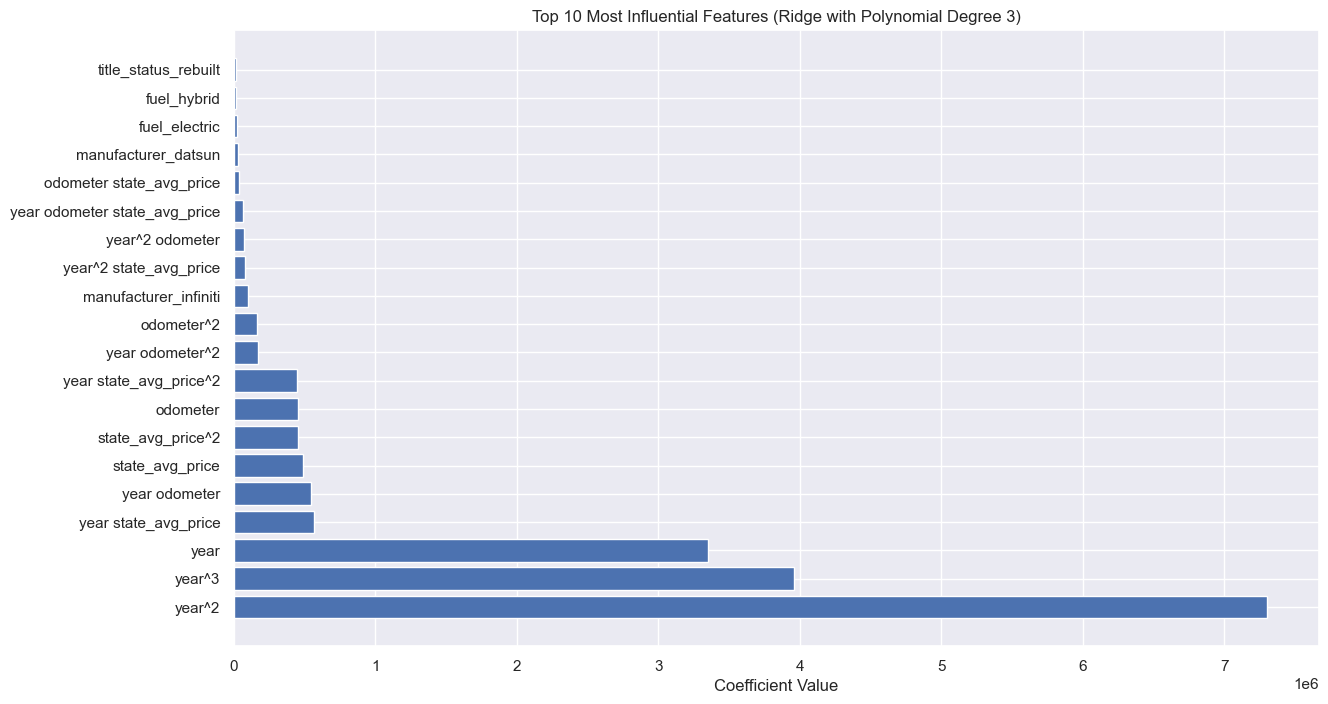

In [187]:
plt.barh(coef_df['feature'].head(20), coef_df['abs_coeff'].head(20))
plt.xlabel('Coefficient Value')
plt.title('Top 10 Most Influential Features (Ridge with Polynomial Degree 3)')

In [188]:
# Clearly Year, Odometer, and State seem to have the biggest impact on price (especially year) for a used car so lets do some analysis on their correlation with price

In [189]:
upper_bound = 500000
lower_bound = 500
df_no_nulls = df_no_nulls[(df_no_nulls['price'] < upper_bound) & (df_no_nulls['price'] > lower_bound)]
df_no_nulls = df_no_nulls.query('odometer != 0 and odometer < 500000')

df_no_nulls.head()

,price,year,manufacturer,fuel,odometer,title_status,transmission,state
27,33590,2014.0,gmc,gas,57923.0,clean,other,al
28,22590,2010.0,chevrolet,gas,71229.0,clean,other,al
29,39590,2020.0,chevrolet,gas,19160.0,clean,other,al
30,30990,2017.0,toyota,gas,41124.0,clean,other,al
31,15000,2013.0,ford,gas,128000.0,clean,automatic,al


<Axes: >

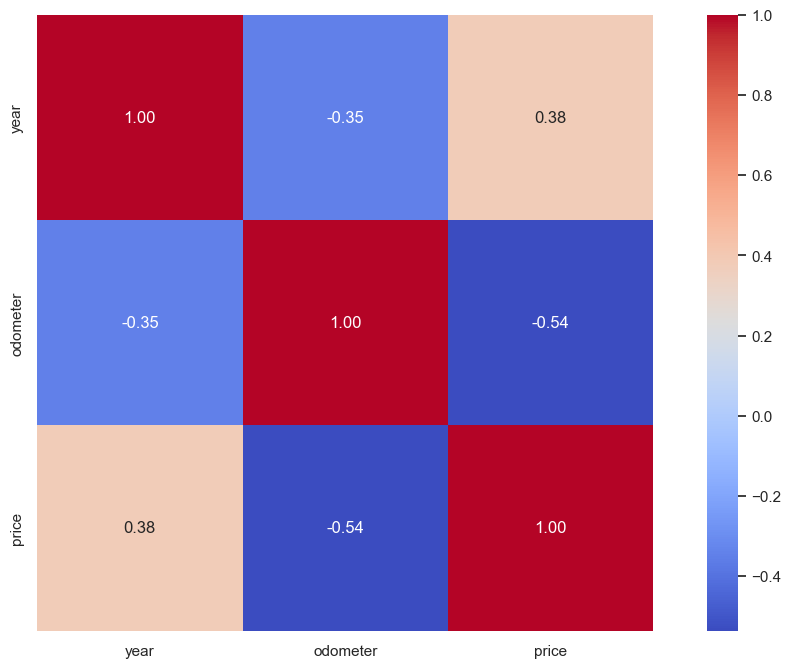

In [190]:

corr_df = df_no_nulls[['year', 'odometer', 'price']]
corr_matrix = corr_df.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)

In [191]:
# Clearly seen here as year increases price increases and as odomoter decreases price increases.

# The model seems to value year, odometer, and state as the most important features for predicting price of a used car high weights on these features lead to lower error in predictions.

In [192]:
# Also made model with manufacturer as a categorical feature and another without and the model seemed to perform better with manufacturer as a feature so lets explore that a bit more

# Group by manufacturer and get mean price and number of cars sold
manufacturer_price = df.groupby('manufacturer')['price'].agg(['mean', 'count']).reset_index()
print(manufacturer_price)



       manufacturer           mean  count
0             acura   21514.608967   5442
1        alfa-romeo   29481.363636    847
2      aston-martin   61136.619048     21
3              audi   25619.048177   6829
4               bmw   21079.020239  12995
5             buick   15632.471385   4945
6          cadillac   21361.597604   6178
7         chevrolet   20433.963212  47815
8          chrysler   10942.252656   5272
9            datsun   16176.084746     59
10            dodge   16917.160738  11161
11          ferrari  125314.012987     77
12             fiat   12962.352941    714
13             ford   21424.986465  61546
14              gmc   25517.824148  14643
15  harley-davidson   13621.129310    116
16            honda   11719.871612  18740
17          hyundai   12201.219021   8748
18         infiniti   21404.427052   4325
19           jaguar   27709.250946   1849
20             jeep   20604.446966  16169
21              kia   12921.495764   7082
22       land rover   15103.000000

In [193]:
# Now lets make a new df with product of mean price and number of cars sold to see which manufacturers which cars generate the most revenue
manufacturer_price['revenue'] = manufacturer_price['mean'] * manufacturer_price['count']
print(manufacturer_price.sort_values(by='revenue', ascending=False))

# Ford, Toyota, and Honda are the 3 most profitable cars in terms of revenue generated. However, this is also just because of the sheer amount sold.

       manufacturer           mean  count       revenue
13             ford   21424.986465  61546  1.318622e+09
7         chevrolet   20433.963212  47815  9.770500e+08
39           toyota   17274.669617  29714  5.132995e+08
34              ram   30653.389819  15597  4.781009e+08
14              gmc   25517.824148  14643  3.736575e+08
20             jeep   20604.446966  16169  3.331533e+08
4               bmw   21079.020239  12995  2.739219e+08
16            honda   11719.871612  18740  2.196304e+08
26    mercedes-benz   22791.625973   9633  2.195517e+08
31           nissan   13296.885257  16062  2.135746e+08
10            dodge   16917.160738  11161  1.888124e+08
3              audi   25619.048177   6829  1.749525e+08
23            lexus   20802.420625   7389  1.537091e+08
6          cadillac   21361.597604   6178  1.319720e+08
37           subaru   14116.691325   8530  1.204154e+08
0             acura   21514.608967   5442  1.170825e+08
40       volkswagen   13857.260545   8298  1.149

C:\Users\batte\AppData\Local\Temp\ipykernel_17500\3149326915.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_most_sold_cars, x='manufacturer', y='mean', palette='viridis')


Text(0.5, 1.0, 'Top 10 Most Sold Cars Mean Price')

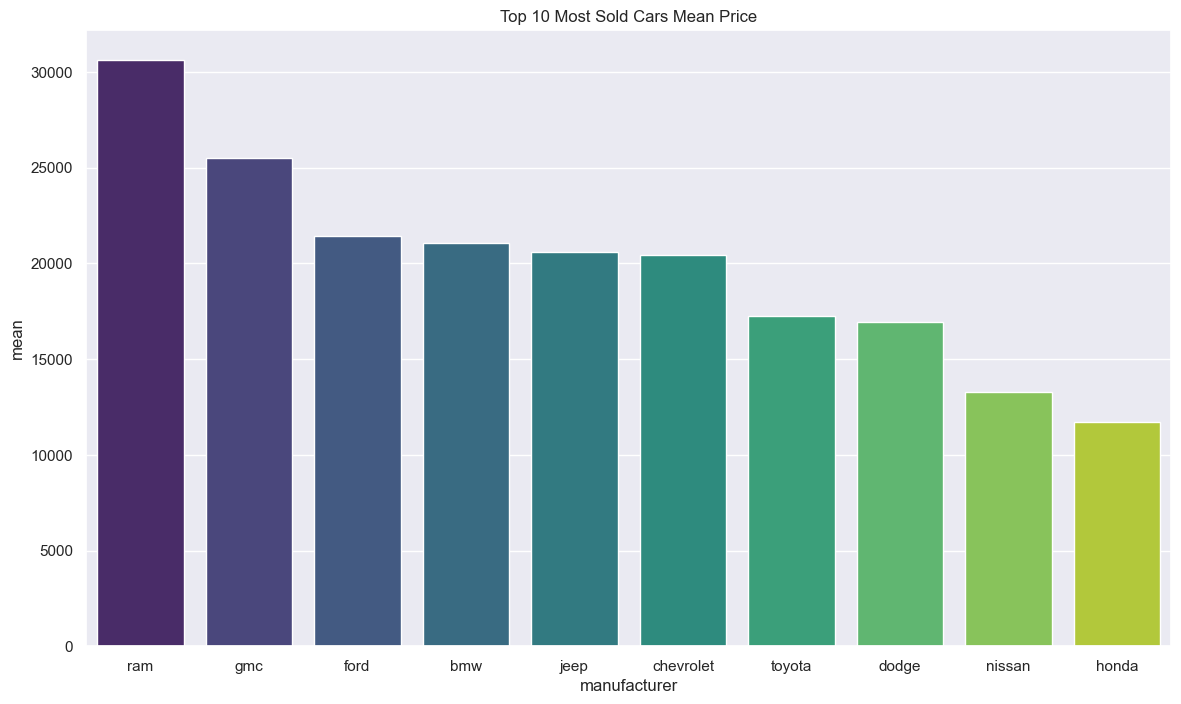

In [194]:
# Now lets plot the top 10 most sold and plot their mean price to see which are the most profitable for a used car dealership
top_10_most_sold_cars = manufacturer_price.sort_values(by='count', ascending=False).head(10).reset_index(drop=True)
top_10_most_sold_cars.sort_values(by='mean', ascending=False, inplace=True)

sns.barplot(data=top_10_most_sold_cars, x='manufacturer', y='mean', palette='viridis')
plt.title('Top 10 Most Sold Cars Mean Price')


C:\Users\batte\AppData\Local\Temp\ipykernel_17500\1905808173.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_most_sold_cars, x='manufacturer', y='mean', palette='viridis')


Text(0.5, 1.0, 'Top 5 Most Sold Cars Mean Price')

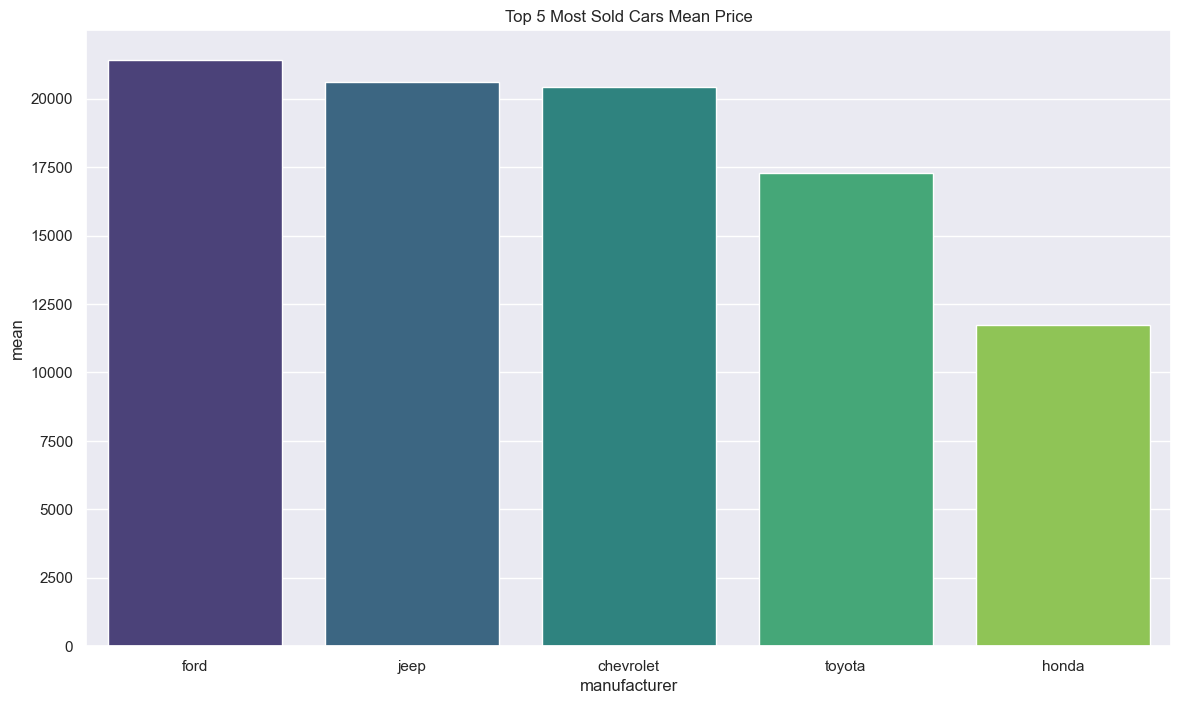

In [195]:
top_5_most_sold_cars = manufacturer_price.sort_values(by='count', ascending=False).head(5).reset_index(drop=True)
top_5_most_sold_cars.sort_values(by='mean', ascending=False, inplace=True)

sns.barplot(data=top_5_most_sold_cars, x='manufacturer', y='mean', palette='viridis')
plt.title('Top 5 Most Sold Cars Mean Price')

In [196]:
# Graphs and numbers indicate that Ram and GMC are the most profitable from the top 10 most sold cars, However, Ford and Chevrolet are by far the most sold cars and still have a high mean price so they are among the most profitable.

# That being said, a dealer might want to focus on selling Rams and GMCs if they want to maximize profit and cant afford to flip luxury cars.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

### SUMMARY

This report analyzes used car sales data to identify the key factors that influence car pricing, helping you make smarter purchasing and pricing decisions.

### KEY FINDINGS

1. Year of the Car
    - Newer models significantly increase selling price
    - Price also seems to grow more quickly for recent years
    - Machine learning models value this as the driving factor for pricing

2. Odometer Reading
    - Lower mileage correlates strongly with higher sale price, with correlation graphs even showing that this is the main driving factor for pricing of cars

3. Manufacturer
    - Varying average prices of cars from different manufacturers where some are definitely more profitable

4. Location (State)
    - Prices very per state with each state having different average car price.

### RECOMMENDATIONS

1. Stock more Ram and GMC trucks: They offer the most profit of the top 10 most sold cars, and outperform all of the top 5 most sold cars in pricing
2. Maintain a balanced inventory: Ford, Jeep, and Chevrolet remain solid sellers with good value and outperform toyata and honda in the list of top 5 most sold cars
3. Target newer, lower mileage vehicles: Year and odometer reading are by far the strongest price indicators with machine learning models valuing more recent years highest.
4. Price Competetively Based on Region: Adjust pricing based on local state averages or delegate more stock to shops in states with higher averages.